In [7]:
import json
import os
import re
import sys
print(sys.stdout.encoding)

UTF-8


# Data

In [8]:
DATA_DIR = '../job-descriptions/'
OUTPUT_DIR = '../software-jobs/'

In [9]:
files = os.listdir(DATA_DIR)
print("Number of files: ", len(files))

Number of files:  17180


## Cleaning

In [16]:
job_descriptions = []
for file in files:
    if ".json" in file:
        try:
            with open(DATA_DIR + file, 'r') as f:
                data = json.load(f)
                data['content'] = re.sub(r'\n+', '\n', data['content'])  # remove multiple newlines
                data['content'] = re.sub(r'\t+', '\t', data['content'])  # remove multiple tabs
                data['content'] = re.sub(r'\r+', '\r', data['content'])  # remove multiple carriage returns
                data['content'] = re.sub(r'\r\n+', '\r\n', data['content'])  # remove multiple carriage returns
                data['content'] = re.sub(r'\n\r+', '\n\r', data['content'])  # remove multiple carriage returns
                data['file'] = file
                job_descriptions.append(data)
        except Exception:
            pass

# EDA

In [17]:
job_titles = [job['title'] for job in job_descriptions]

In [18]:
# split job titles into words
job_titles_words = []
for title in job_titles:
    job_titles_words.extend(title.split(' '))

In [19]:
# wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [20]:
wordcloud = WordCloud(width=800, height=400).generate(' '.join(job_titles_words))

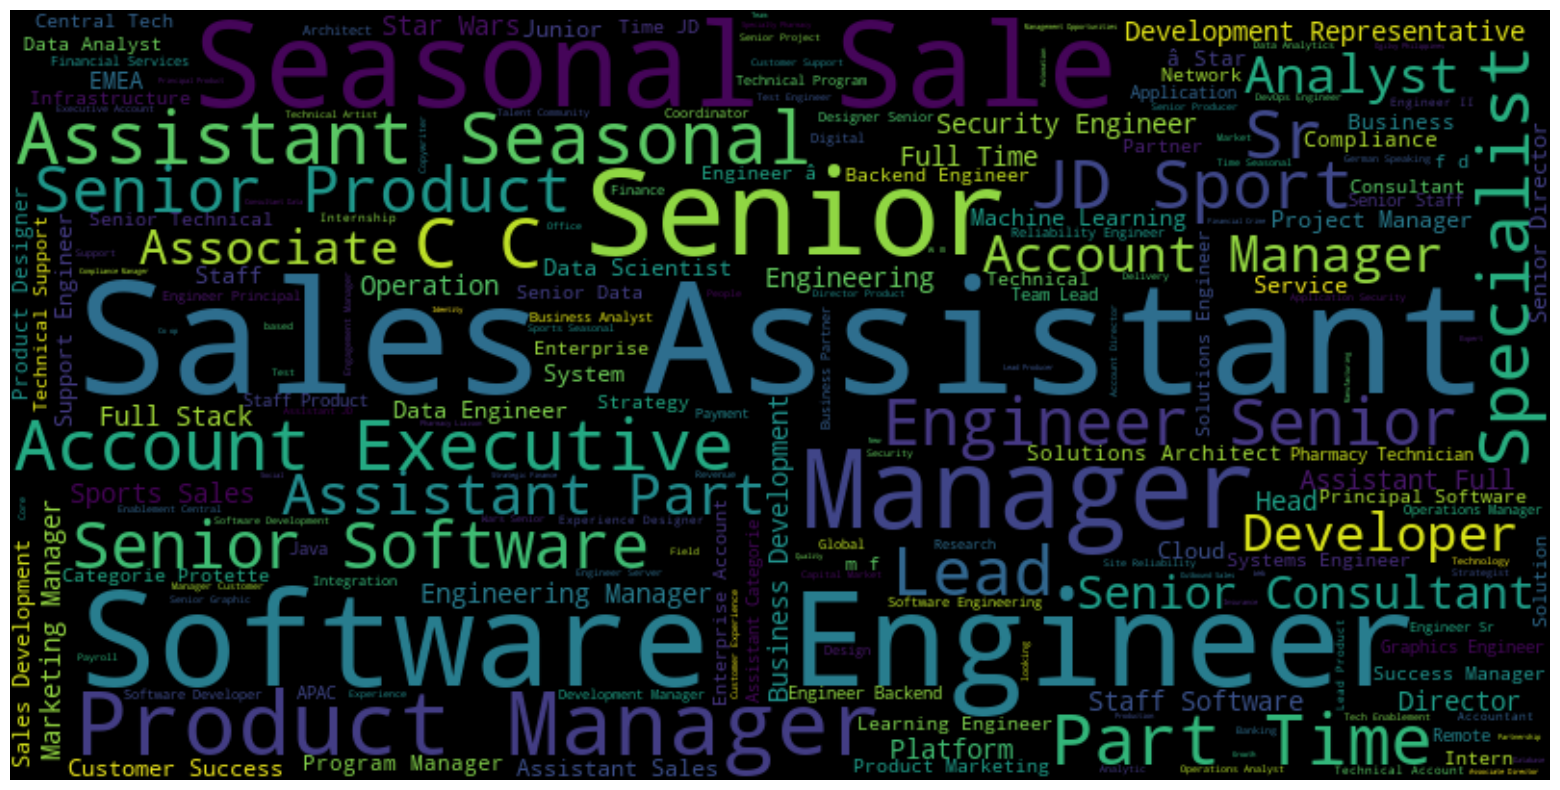

In [21]:
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
# most common words
from collections import Counter

In [23]:
Counter(job_titles_words).most_common(50)

[('-', 1953),
 ('Senior', 1368),
 ('Engineer', 1215),
 ('Sales', 989),
 ('Manager', 919),
 ('', 917),
 ('Assistant', 772),
 ('Software', 633),
 ('Product', 460),
 ('Seasonal', 397),
 ('&', 388),
 ('Data', 383),
 ('Account', 371),
 ('Manager,', 353),
 ('Lead', 338),
 ('Engineer,', 310),
 ('Operations', 264),
 ('Staff', 263),
 ('Analyst', 260),
 ('Technical', 254),
 ('Business', 230),
 ('Engineering', 223),
 ('of', 222),
 ('Specialist', 222),
 ('Development', 217),
 ('Marketing', 215),
 ('and', 198),
 ('Executive', 197),
 ('Sr.', 190),
 ('Customer', 183),
 ('Developer', 180),
 ('Sports', 180),
 ('JD', 175),
 ('Principal', 174),
 ('Designer', 170),
 ('Associate', 170),
 ('C.C.', 167),
 ('â€“', 166),
 ('Director', 165),
 ('Support', 164),
 ('Time', 164),
 ('Security', 163),
 ('Solutions', 158),
 ('Director,', 152),
 ('Consultant', 144),
 ('Management', 142),
 ('Services', 140),
 ('Full', 131),
 ('Architect', 124),
 ('Systems', 117)]

In [24]:
software_job_titles = ['software', 'data', 'engineer', 'full stack']
software_jobs_count = 0
for job in job_descriptions:
    if any(word in job['title'].lower() for word in software_job_titles):
        software_jobs_count += 1
        with open(OUTPUT_DIR + job['file'], 'w') as f:
            json.dump(job, f)
print("Number of software jobs: ", software_jobs_count)

Number of software jobs:  2127
